In [1]:
from matplotlib import pyplot as plt
from moveminer import Trajectory
from moveminer import constants
import moveminer as moveminer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

c:\Users\edgar\anaconda3\envs\geotraj\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
df = pd.read_csv('./datasets/test.csv')
df = df[df['id'] == df['id'].unique()[0]]

In [3]:
traj = moveminer.Trajectory(df=df, x='x', y='y', t='datetime', geo=True)

#### Stop Detection

In [4]:
from sklearn import metrics
y_pred = moveminer.stop_detection.speed(traj, 0.2)
y_true = traj.gdf[constants.STOP]
print(metrics.f1_score(y_true, y_pred.gdf[constants.STOP]))

0.9230769230769231


### Noise Filter

In [5]:
traj.gdf[constants.SPEED].max()

16.06

In [6]:
new_traj = moveminer.noise_filter.speed_filter(traj, 15)

In [7]:
new_traj.gdf[constants.SPEED].max()

14.31

### Compression

<Axes: >

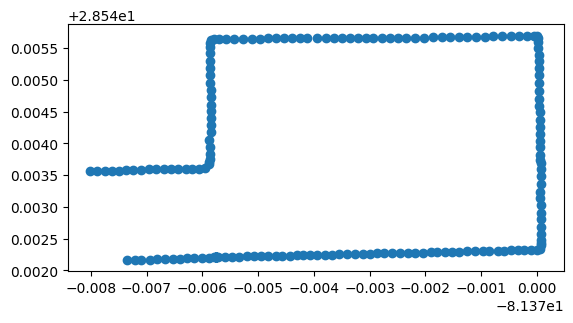

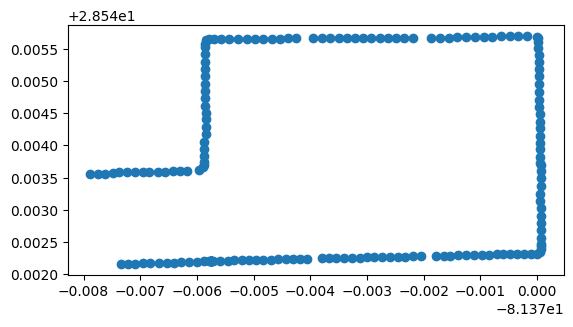

In [8]:
traj.gdf.plot()
ssc = moveminer.compression.SimpleSpacialCompression(.2)
compressed_traj = ssc(traj)
compressed_traj.gdf.plot()

### Segmentation

In [9]:
distance_segmentation = moveminer.segmentation.DistanceSegmentation(0.1)
segs = distance_segmentation.segment(traj)

<Axes: >

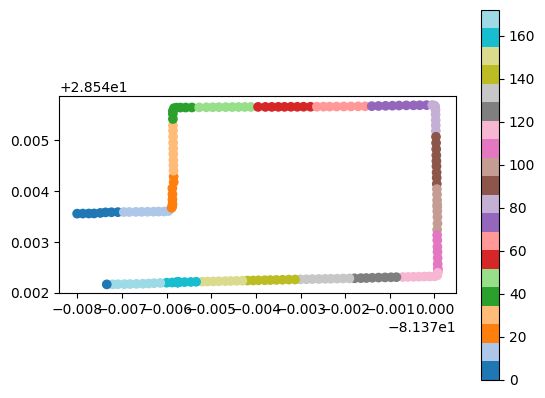

In [10]:
segs.gdf.plot(column='segment', cmap='tab20', legend=True)

### Map-Matching

In [21]:
from random import random, randint
from shapely import transform
traj_blur = traj.copy()
def shift(p):
    return transform(p, lambda x: x + ((random()-0.5) * 0.0001 * randint(0, 3)))
traj_blur.gdf['geometry'] = traj_blur.gdf['geometry'].apply(shift)

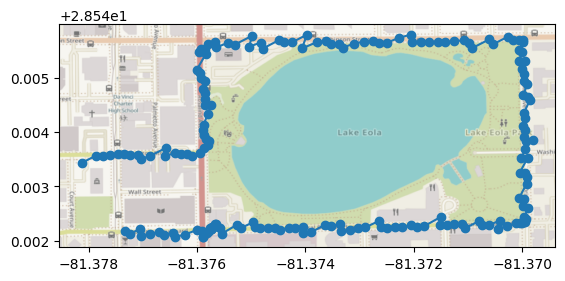

In [22]:
moveminer.visualization.image.plot(traj_blur)

In [23]:
traj_matched = moveminer.map_matching.map_matching(traj_blur, 'drive')

<Figure size 2000x1200 with 0 Axes>

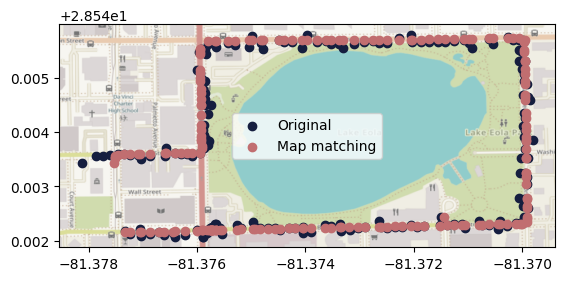

In [24]:
plt.figure(figsize=(20,12))
ax = traj_blur.gdf.plot(c='#151e3f', label='label')
ax = traj_matched.gdf.plot(ax=ax, c='#c16e70', label='label')
ax.legend(['Original', 'Map matching'])
moveminer.visualization.image.plot(traj_matched, ax=ax)